In [2]:
#----------------------------------------------------------------------------------------
#-----------------Section A: Data Preprocessing------------------------------------------
#----------------------------------------------------------------------------------------

In [2]:

# Import relevant libraries---------------------------------------------------------

#Standard libraries for data analysis:----------------------
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm


# sklearn modules for data preprocessing-------------------------------------

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 


#sklearn modules for Model Selection--------------------------------------

from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#sklearn modules for Model Evaluation & Improvement---------------------------
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
  

#Standard libraries for data visualization---------------------

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve


#Miscellaneous Utilitiy Libraries--------------------------------------
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib



In [3]:
#Encode Categorical data----------------------------------------------------------------
dataset = pd.read_csv('dataset.csv')
dataset.head()
dataset.columns
dataset.describe()
dataset.dtypes
dataset.columns.to_series().groupby(dataset.dtypes).groups
dataset.info()
dataset.isna().any()
dataset["isChurn"].value_counts()
#Incase if user_id is an object:
# identity = dataset["uid"]
# dataset = dataset.drop(columns="uid")
# convert rest of categorical variable into dummy

# dataset= pd.get_dummies(dataset)
# print('2',dataset.columns)
#Rejoin userid to dataset (column concatenation)

# dataset = pd.concat([dataset, identity], axis = 1)
# print('3',dataset.columns)
# print('4',dataset.columns)
#identify response variable:
    
response = dataset["isChurn"]

dataset = dataset.drop(['last_time_play',"isChurn"],axis=1)


#Generate training and test datasets of dependent and independent variables-----------------


X_train, X_test, y_train, y_test = train_test_split(dataset, response,
                                                    stratify=response, 
                                                    test_size = 0.2, #use 0.9 if data is huge.
                                                    random_state = 0)

#to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


# Removing Identifiers-------------------------------------------------------------------

train_identity = X_train['uid']
X_train = X_train.drop(columns = ['uid'])

test_identity = X_test['uid']
X_test = X_test.drop(columns = ['uid'])

# Feature Scaling-----------------------------------------------------------------------

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9156 entries, 0 to 9155
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   uid                        9156 non-null   object 
 1   high_level                 9156 non-null   float64
 2   total_level                9156 non-null   float64
 3   time_to_play               9156 non-null   float64
 4   ball_popped                9156 non-null   float64
 5   ball_drop                  9156 non-null   float64
 6   shot                       9156 non-null   float64
 7   is_win                     9156 non-null   float64
 8   is_first_time_win          9156 non-null   float64
 9   powerball                  9156 non-null   float64
 10  number_of_sessions         9156 non-null   float64
 11  length_of_sessions         9156 non-null   float64
 12  interval_between_sessions  9156 non-null   float64
 13  playCount                  9156 non-null   float

In [5]:
def count_result(y_pred,y_test):
    T=0
    F=0
    for x in y_pred:
        if x == True:
            T += 1
        else: F+=1
    print('predict: ',T, F)

    T=0
    F=0
    for x in y_test:
        if x == True:
            T += 1
        else: F+=1
    print('test: ',T, F)
    print(len(y_pred),len(y_test))

In [5]:

#- Logistic Regression-----------------
# Fitting Logistic Regression to the Training set 
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

#Evaluate results
print('Logistic Regression')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])



# Support Vector Machine (linear classifier)------------------------


# Fitting SVM (SVC class) to the Training set:

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
print('SVM linear')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['SVM (Linear)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#K-Nearest Neighbours------------------------


# Fitting KNN to the Training set:

classifier = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred  = classifier.predict(X_test)

#Evaluate results
print('KNN, n=24')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['K-Nearest Neighbours', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



#Kernel SVM------------------------

# Fitting Kernel SVM to the Training set:

classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
print('SVC, kernel rbf')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Kernel SVM', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#  Naive Byes------------------------------------------------

# Fitting Naive Byes to the Training set:
    
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
print('Naiev Byes (GaussianNB)')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Naive Byes', acc, prec, rec, f1, f2]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)



# Decision Tree---------------------------------------------


# Fitting Decision Tree to the Training set:

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results 

y_pred = classifier.predict(X_test)

#Evaluate results
print('Decision Tree')
count_result(y_pred,y_test)

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Decision Tree', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)


#Random Forest--------------------------------------------


# Fitting Random Forest to the Training set:
    
classifier = RandomForestClassifier(n_estimators = 88, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)



# Predicting the Test set results 
y_pred = classifier.predict(X_test)

#Evaluate results
print('Random Forest n=88')
count_result(y_pred,y_test)

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

results = results.append(model_results, ignore_index = True)

results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    

print (results)

Logistic Regression
predict:  7 1825
test:  242 1590
1832 1832


In [ ]:
#----------------------------------------------------------------------------------------
#-----------------Section D: Model Evaluation (Logistic Regression)----------------------
#----------------------------------------------------------------------------------------
print(classifier)

RandomForestClassifier(criterion='entropy', n_estimators=88, random_state=0)


In [8]:

# Train & evaluate Chosen Model---------------------------------------------
    
    
# Fit Chosen Model on the Training dataset:
# classifier = RandomForestClassifier(n_estimators = 88, criterion = 'entropy', random_state = 0)
# classifier = SVC(kernel = 'linear', probability=True, random_state = 0)    
# classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = classifier.predict(X_test)


#Evaluate Model Results on Test Set:

acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
f2 = fbeta_score(y_test, y_pred, beta=2.0)

results = pd.DataFrame([['DecisionTreeClassifier)', acc, prec, rec, f1, f2]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'F2 Score'])

print (results)

filename = 'finalized_model.sav'
joblib.dump(classifier, filename)

                     Model  Accuracy  Precision   Recall  F1 Score  F2 Score
0  DecisionTreeClassifier)  0.820961   0.319328  0.31405  0.316667  0.315091


['finalized_model.sav']

In [9]:

# Re-check k-Fold Cross Validation:

accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("DecisionTreeClassifier: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


DecisionTreeClassifier: 0.81 (+/- 0.02)


Text(0.5, 16.0, 'Predicted label\n')

<Figure size 2016x1440 with 0 Axes>

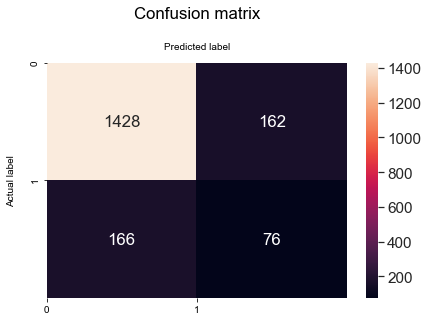

In [15]:


#Visualize results on a Confusion Matrix:
    
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')


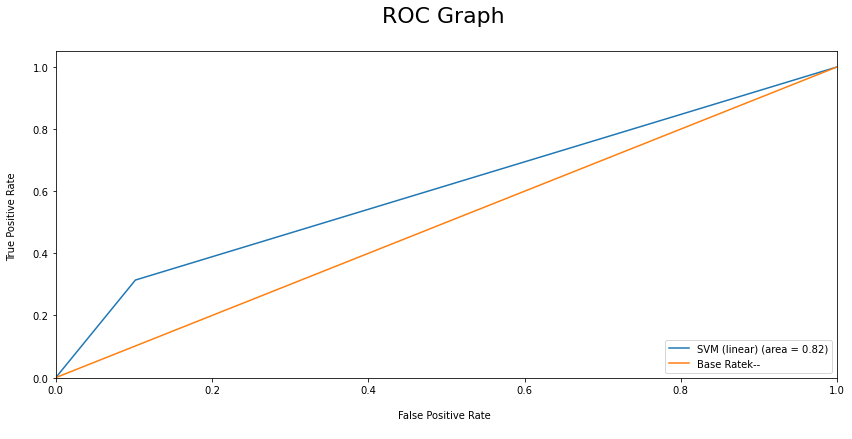

In [10]:
# Evaluate the model using ROC Graph

classifier.fit(X_train, y_train) 
probs = classifier.predict_proba(X_test) 
probs = probs[:, 1] 
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(rf_fpr, rf_tpr, label='DecisionTreeClassifier (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()


In [17]:
T=0
F=0
for x in y_pred:
    if x == True:
        T += 1
    else: F+=1
print(T, F)

T=0
F=0
for x in y_test:
    if x == True:
        T += 1
    else: F+=1
print(T, F)
print(len(y_pred),len(y_test))

238 1594
242 1590
1832 1832


In [ ]:

# Predict Feature Importance------------------------------------------------------
 

# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(dataset.drop(columns = 'uid').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

In [ ]:

#----------------------------------------------------------------------------------------
#-----------------Section E: Model Improvement (Logistic Regression)----------------------------
#----------------------------------------------------------------------------------------


In [ ]:

# Hyper parameter Tuning  --------------------------------------


# Round 1: -----------------------------------------------------------------
 
# Select Regularization Method   
import time
# penalty = ['l1', 'l2']

# Create regularization hyperparameter space
# C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
# parameters = dict(C=C, penalty=penalty)

# lr_classifier = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = "balanced_accuracy",
#                            cv = 10,
#                            n_jobs = -1)
parameters = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
lr_classifier = GridSearchCV(SVC(), parameters, refit = True, verbose = 3)

t0 = time.time()
# lr_classifier  = lr_classifier .fit(X_train, y_train)
lr_classifier.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

# lr_best_accuracy = lr_classifier.best_score_
# lr_best_parameters = lr_classifier.best_params_
# lr_best_accuracy, lr_best_parameters

#verdict: No accuracy lift post hyperparameter tuning (round1)

# print best parameter after tuning 
print(lr_classifier.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(lr_classifier.best_estimator_) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.730 total time=  16.5s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.730 total time=  16.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.730 total time=  16.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.728 total time=  16.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.729 total time=  16.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.730 total time=  16.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.730 total time=  16.4s


KeyboardInterrupt: 

In [ ]:
#Final Hyper parameter tuning and selection --------------------------------------

# lr_classifier = LogisticRegression(random_state = 0, penalty = 'l2')
# lr_classifier.fit(X_train, y_train)


# Predict the Test set results

y_pred = lr_classifier.predict(X_test)

#probability score
# y_pred_probs = lr_classifier.predict_proba(X_test)
# y_pred_probs  = y_pred_probs [:, 1] 

In [ ]:

#----------------------------------------------------------------------------------------
#-----------------Section F: Comparing Model Predictions against test set----------------
#----------------------------------------------------------------------------------------


In [ ]:

# Compare predictions against test set -------------------------------------------------------


#Revalidate final results with Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
print (cm)


[[488   1]
 [242   0]]


In [ ]:

#Confusion Matrix as a quick Crosstab:
    
pd.crosstab(y_test,pd.Series(y_pred),rownames=['ACTUAL'],colnames=['PRED'])


PRED,False,True
ACTUAL,,
False,17,0
True,124,1


Test Data Accuracy: 0.6676


<Figure size 2016x1440 with 0 Axes>

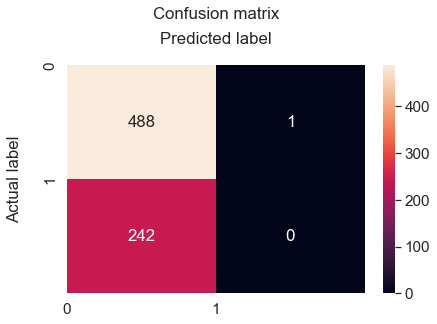

In [ ]:

#visualize Confusion Matrix:

cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (28,20))


fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g'#,cmap="YlGnBu" 
           )
class_names=[0,1]
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))



In [ ]:

# Format Final Results:-------------------------------------------------------


final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results['predictions'] = y_pred 

# final_results["propensity_to_convert(%)"] = y_pred_probs 

# final_results["propensity_to_convert(%)"] = final_results["propensity_to_convert(%)"]*100

# final_results["propensity_to_convert(%)"]=final_results["propensity_to_convert(%)"].round(2)

# final_results = final_results[['uid', 'Churn', 'predictions', 'propensity_to_convert(%)']]
final_results = final_results[['uid', 'isChurn', 'predictions']]

# final_results ['Ranking'] = pd.qcut(final_results['propensity_to_convert(%)'].rank(method = 'first'),10,labels=range(10,0,-1))
print(type(final_results))
print (final_results)
final_results.to_excel('result.xlsx')

<class 'pandas.core.frame.DataFrame'>
                               uid  isChurn  predictions
1575  MzuAFn6RslVyYOZGqEpxqgRG3Gi2    False        False
2822  dRw2hEyQplNU5owaxPuXM2OyLok1    False        False
8108   lAcjyZI3dek961LBr3bPUlbBhq2    False        False
2789  d1J3JWv7noMKlyI7Ngi2UjYwror1    False        False
3834  rBNWiGcSDsd543HLI3CR0RcBRq52    False        False
...                            ...      ...          ...
626   8yNEFTOY6qUlstMEeOUOyYe1r9G3    False        False
3419  laYsrxe80XbP99cElx2FYxTS3sy1    False         True
736   AYTQpejtKjRRcntFBzyXN4qqTdV2    False        False
2253  VZbmy5hG6lMQO2AGJoLbpE7RJVg2    False        False
2867  e6LrTzW5zFPmEaEaPpsshxKGbuG3    False        False

[1628 rows x 3 columns]


In [ ]:
#----------------------------------------------------------------------------------------
#-----------------Section G: Deploy the Model and Predict Future Datapoints---------------
#----------------------------------------------------------------------------------------

In [ ]:
# Save the model-------------------------------------------------------------------

filename = 'final_model.model'
i = [lr_classifier]
joblib.dump(i,filename)


NameError: name 'lr_classifier' is not defined